In [17]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import tensorflow as tf
%matplotlib inline 


2018-11-06 13:11:26,364 DEBUG matplotlib.pyplot : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
import logging
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")

2018-11-06 12:58:47,118 DEBUG root : Logging enabled


In [11]:
import os
import sys
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
import humans
import abstract_data
import mrcnn.model as model

In [5]:
logging.debug("Begin load of coco data")
coco_data = humans.load_data(data_type="COCO", dataset=COCO_DIR,subset="minival", occlude_data_path=OCCLUDE_DIR, year=2014)
logging.debug("End load of coco data")

2018-11-06 12:59:19,733 DEBUG root : Loading data of type COCOm=, subset minival from location /data/AI/Data/coco
loading annotations into memory...
Done (t=0.97s)
creating index...
Data set type is instances
index created!
No coco data exists at /data/AI/Data/coco/annotations/panoptic_minival2014.json
2018-11-06 12:59:20,721 DEBUG root : Adding occlusions to the data
2018-11-06 12:59:20,723 DEBUG root : Loading occlusion data from /data/AI/Data/VOCdevkit/VOC2012
2018-11-06 13:00:43,071 DEBUG root : 1001 Occluders loaded


In [8]:
logging.debug("Begin setup dataset")
dataset = humans.DensePoseDataSet(coco_data)
dataset.load_prepare()
logging.debug("End setup dataset [image count %s]", len(dataset.image_info))

2018-11-06 13:04:19,044 DEBUG root : Begin setup dataset
2018-11-06 13:04:21,925 DEBUG root : Adding occlusion information to images
2018-11-06 13:04:22,057 DEBUG root : Added occlusion information to images
2018-11-06 13:04:22,064 DEBUG root : End setup dataset [image count 1508]


In [13]:
config = humans.HumanConfig()
data_generator = model.DataGenerator(dataset, config, batch_size=1)
logging.debug("Created data generator with %s elements", data_generator.__len__())

2018-11-06 13:07:57,867 DEBUG root : Creating data sequencer batch size 1
2018-11-06 13:07:57,888 DEBUG root : Created data generator with 1508 elements


In [20]:
logging.debug("Getting first element")
inputs, outputs = data_generator.__getitem__(0)
batch_images, batch_image_meta, batch_rpn_match, batch_rpn_bbox, batch_gt_class_ids, batch_gt_boxes, batch_gt_mask = inputs
logging.debug("Got first element")

2018-11-06 13:16:30,719 DEBUG root : Getting first element
2018-11-06 13:16:30,722 DEBUG root : Loading data for image 963
2018-11-06 13:16:30,963 DEBUG root : Finished loading data for image 963
2018-11-06 13:16:31,020 DEBUG root : Got first element


2018-11-06 13:27:57,171 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 13:27:57,212 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 13:27:57,261 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 13:27:57,285 DEBUG matplotlib.axes._base : update_title_pos
2018-11-06 13:27:57,299 DEBUG matplotlib.axes._base : update_title_pos


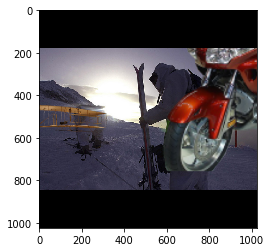

In [42]:
image = np.round(batch_images[0,:,:] + config.MEAN_PIXEL).astype('uint8')
plt.imshow(image)